# Lasso

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/Documents/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
path=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [3]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model = LassoRegressor()
Plotters = Plotter()

In [5]:
# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_data = f'{path}Brain_age_single_electrode/single_electrode_data.xlsx'

df = pd.read_excel(file_path_data)

In [10]:
# Extraer el índice de la columna 'Slope' y 'TF'
start_col = df.columns.get_loc("Slope")
end_col = df.columns.get_loc("TF")

# Obtener los nombres de las columnas desde 'Slope' hasta 'TF' en una lista
column_names = df.columns[start_col:end_col + 1].tolist()
print(column_names)


['Slope', 'Knee', 'Offset', 'FD', 'PE', 'WMEAN', 'SSV', 'Delta_canon_RPD', 'Delta_canon_EPP', 'Theta_canon_RPD', 'Theta_canon_EPP', 'Alpha1_canon_RPD', 'Alpha1_canon_EPP', 'Alpha2_canon_RPD', 'Alpha2_canon_EPP', 'Beta1_canon_RPD', 'Beta1_canon_EPP', 'Beta2_canon_RPD', 'Beta2_canon_EPP', 'Beta3_canon_RPD', 'Beta3_canon_EPP', 'Gamma_canon_RPD', 'Gamma_canon_EPP', 'Delta_subj_spec_RPD', 'Delta_subj_spec_EPP', 'Theta_subj_spec_RPD', 'Theta_subj_spec_EPP', 'Low_subj_spec_RPD', 'Low_subj_spec_EPP', 'High_subj_spec_RPD', 'High_subj_spec_EPP', 'Beta_subj_spec_RPD', 'Beta_subj_spec_EPP', 'Gamma_subj_spec_RPD', 'Gamma_subj_spec_EPP', 'IAF', 'TF']


In [13]:
df['ID-unique'] = range(len(df))

In [14]:
df.to_excel(file_path_data, index=False)

In [11]:
#72 features
features = ['Slope', 'Knee', 'Offset', 'FD', 'PE', 'WMEAN', 'SSV', 'Delta_canon_RPD', 'Delta_canon_EPP', 'Theta_canon_RPD', 'Theta_canon_EPP', 'Alpha1_canon_RPD', 'Alpha1_canon_EPP', 'Alpha2_canon_RPD', 'Alpha2_canon_EPP', 'Beta1_canon_RPD', 'Beta1_canon_EPP', 'Beta2_canon_RPD', 'Beta2_canon_EPP', 'Beta3_canon_RPD', 'Beta3_canon_EPP', 'Gamma_canon_RPD', 'Gamma_canon_EPP', 'Delta_subj_spec_RPD', 'Delta_subj_spec_EPP', 'Theta_subj_spec_RPD', 'Theta_subj_spec_EPP', 'Low_subj_spec_RPD', 'Low_subj_spec_EPP', 'High_subj_spec_RPD', 'High_subj_spec_EPP', 'Beta_subj_spec_RPD', 'Beta_subj_spec_EPP', 'Gamma_subj_spec_RPD', 'Gamma_subj_spec_EPP', 'IAF', 'TF']

# DATA

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_data = f'{path}Brain_age_single_electrode/single_electrode_data.xlsx'

df = pd.read_excel(file_path_data)


df_CN_filtrado = df[(df['Age'] >=20) & (df['Age'] <= 90)].reset_index(drop=True)

df_CN_filtrado = df_CN_filtrado.dropna()

X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)


X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

In [30]:
# Mostrar el conteo total de valores NaN por columna en el DataFrame X
print(X_CN_scaled.isna().sum())

# Contar el total de NaNs en el DataFrame
total_nulos = X_CN_scaled.isna().sum().sum()
print(f"Total de valores nulos en el conjunto de datos: {total_nulos}")


Slope                  0
Knee                   0
Offset                 0
FD                     0
PE                     0
WMEAN                  0
SSV                    0
Delta_canon_RPD        0
Delta_canon_EPP        0
Theta_canon_RPD        0
Theta_canon_EPP        0
Alpha1_canon_RPD       0
Alpha1_canon_EPP       0
Alpha2_canon_RPD       0
Alpha2_canon_EPP       0
Beta1_canon_RPD        0
Beta1_canon_EPP        0
Beta2_canon_RPD        0
Beta2_canon_EPP        0
Beta3_canon_RPD        0
Beta3_canon_EPP        0
Gamma_canon_RPD        0
Gamma_canon_EPP        0
Delta_subj_spec_RPD    0
Delta_subj_spec_EPP    0
Theta_subj_spec_RPD    0
Theta_subj_spec_EPP    0
Low_subj_spec_RPD      0
Low_subj_spec_EPP      0
High_subj_spec_RPD     0
High_subj_spec_EPP     0
Beta_subj_spec_RPD     0
Beta_subj_spec_EPP     0
Gamma_subj_spec_RPD    0
Gamma_subj_spec_EPP    0
IAF                    0
TF                     0
dtype: int64
Total de valores nulos en el conjunto de datos: 0


# Hyperparameter Tuning

In [24]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [25]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

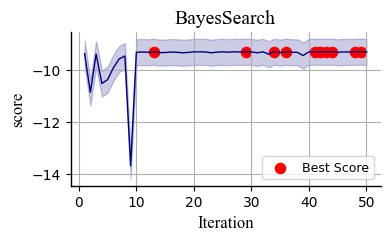

Top 1: Iteration 36, Score -9.318315723021563
Top 2: Iteration 48, Score -9.318385085825591
Top 3: Iteration 34, Score -9.318388865165463
Top 4: Iteration 29, Score -9.318458177809681
Top 5: Iteration 44, Score -9.318582289664239
Top 6: Iteration 13, Score -9.318704464029896
Top 7: Iteration 41, Score -9.318803271897778
Top 8: Iteration 49, Score -9.318903797321406
Top 9: Iteration 42, Score -9.319568864225278
Top 10: Iteration 43, Score -9.319729631258799


In [26]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [27]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.008938664107441954, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.008704129065551961,
  'max_iter': 10000,
  'tol': 0.009977318685566915},
 {'alpha': 0.009005267275840511, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.008634712163558938, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.009349139706024533,
  'max_iter': 10000,
  'tol': 0.008125086156784266},
 {'alpha': 0.009284738226417408, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.00938395400674026, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.008601051116696668,
  'max_iter': 10000,
  'tol': 0.007328940068500942},
 {'alpha': 0.009082872876646017,
  'max_iter': 10000,
  'tol': 0.002872691555826906},
 {'alpha': 0.009963008652831756,
  'max_iter': 9977,
  'tol': 1.2347529654744285e-05}]

# Training 1-Iteration 10Kfold 80%train 20%test


In [31]:
from sklearn.model_selection import train_test_split
# Dividir el dataframe
df_train, df_test = train_test_split(df_concatenado_CN, test_size=0.2, random_state=42)

# Resultado: df_train y df_test son dataframes


In [32]:
results_labels_df_CN_train, results_labels_df_CN_val, results_labels_patient, results_model, results_per_fold_CN_train, results_per_fold_CN_val, results_per_fold_patient= model.trainer(df_CN=df_train, n_splits=10, n_iterations=1, params_=best_params_[0], scaler=2)

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:235: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

# Test

In [33]:
import pandas as pd
from scipy.stats import linregress


def process_test_data(df_train, df_test, results_model,results_per_fold_train, n_folds=10 ,feature_col_range= slice(None, -2),scaler=2):
   
    X_test = df_test.iloc[:, :-2]  # Features
    y_test = df_test.iloc[:, -2]   # Labels (Age)
    ID_test = df_test.iloc[:, -1]  # Unique IDs

    # DataFrame para almacenar los resultados generales
    results_labels_df_CN_test = pd.DataFrame(columns=['y_labels', 'y_pred', 'y_pred_corrected', 'GAP', 'GAP_corrected', 'ID-unique'])
    results_per_fold_CN_test = []

    for fold in range(n_folds):
        # Train
        ID_train_fold = results_per_fold_train[fold]['ID-unique']
        df_train_fold = df_train[df_train['ID-unique'].isin(ID_train_fold)]
        X_train_kf = df_train_fold.iloc[:, feature_col_range]  # Features
        y_train_kf = df_train_fold.iloc[:, -2]  # Labels

        #slope = results_model['slope'][fold]
        #intercept = results_model['intercept'][fold]
        #mean_X_train_kf = results_model['mean_X_train_kf'][fold]
        #std_X_train_kf = results_model['std_X_train_kf'][fold]
        
        if scaler == 1:
            # No escalar
            X_train_kf_scaled = X_train_kf
            X_test_CN_scaled = X_test
        elif scaler == 2:
            # Z-score scaling
            mean_X_train_kf = X_train_kf.mean()
            std_X_train_kf = X_train_kf.std()
            X_train_kf_scaled = (X_train_kf - mean_X_train_kf) / std_X_train_kf
            X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf
        elif scaler == 3:
            # MinMax scaling (manual)
            min_X_train_kf = X_train_kf.min()
            max_X_train_kf = X_train_kf.max()
            X_train_kf_scaled = (X_train_kf - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)
            X_test_CN_scaled = (X_test - min_X_train_kf) / (max_X_train_kf - min_X_train_kf)


        # Escalado de los datos de prueba
        X_test_CN_scaled = (X_test - mean_X_train_kf) / std_X_train_kf

        # Obtener el modelo del fold actual
        model_ = results_model['model'][fold]

        y_pred_CN_train = model_.predict(X_train_kf_scaled)
        gap_CN_train = y_pred_CN_train - y_train_kf



        # Predicción
        y_pred_CN_test = model_.predict(X_test_CN_scaled)
        gap_CN_test = y_pred_CN_test - y_test

        slope, intercept, _, _, _ = linregress(y_train_kf, gap_CN_train)


        # Corrección de la predicción
        y_pred_corrected_CN_test = y_pred_CN_test - (slope * y_test + intercept)
        corrected_gap_CN_test = gap_CN_test - (slope * y_test + intercept)

        # Crear un DataFrame temporal con los resultados
        temp_CN_df_test = pd.DataFrame({
            'y_labels': y_test,
            'y_pred': y_pred_CN_test,
            'y_pred_corrected': y_pred_corrected_CN_test,
            'GAP': gap_CN_test,
            'GAP_corrected': corrected_gap_CN_test,
            'ID-unique': y_test
        })

        # Concatenar los resultados del fold al DataFrame general
        results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)
        results_per_fold_CN_test.append(temp_CN_df_test.copy())

    return results_labels_df_CN_test, results_per_fold_CN_test


In [34]:
results_labels_df_CN_test, results_per_fold_CN_test = process_test_data(df_train,df_test, results_model,results_per_fold_CN_train)


C:\Users\felipe\AppData\Local\Temp\ipykernel_9212\873531791.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_test, temp_CN_df_test], ignore_index=True)


# Evaluación del modelo

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de métricas
#metrics = ['mae', 'mse', 'rmse', 'r2']

# Diccionario para almacenar los resultados
#results = {'train': {m: [] for m in metrics}, 
#           #'val': {m: [] for m in metrics}, 
#           'test': {m: [] for m in metrics}}

metrics = ['mae', 'mse', 'rmse', 'r2']
results = {'train': {m: [] for m in metrics}, 
        'val': {m: [] for m in metrics}, 
        'test': {m: [] for m in metrics}}

# Función para calcular las métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

# Recorrer los 10 folds
for fold_idx in range(10):
    fold_data_CN_train = results_per_fold_CN_train[fold_idx]
    fold_data_CN_val = results_per_fold_CN_val[fold_idx]
    fold_data_CN_test = results_per_fold_CN_test[fold_idx]

    # Obtener los valores de y_labels e y_pred_corrected
    y_true_1 = fold_data_CN_train['y_labels']
    y_pred_1 = fold_data_CN_train['y_pred']
    y_true_2 = fold_data_CN_val['y_labels']
    y_pred_2 = fold_data_CN_val['y_pred']
    y_true_3 = fold_data_CN_test['y_labels']
    y_pred_3 = fold_data_CN_test['y_pred']
    
    # Calcular métricas para el fold actual
    fold_metrics_1 = calculate_metrics(y_true_1, y_pred_1)
    fold_metrics_2 = calculate_metrics(y_true_2, y_pred_2)
    fold_metrics_3 = calculate_metrics(y_true_3, y_pred_3)

    # Guardar los resultados en el diccionario
    for metric in metrics:
        results['train'][metric].append(fold_metrics_1[metric])
        results['val'][metric].append(fold_metrics_2[metric]) 
        results['test'][metric].append(fold_metrics_3[metric]) 

# Imprimir resultados
#for metric in metrics:
#    print(f"{metric}: {results['train'][metric]}")

labels = ['train', 'val','test']

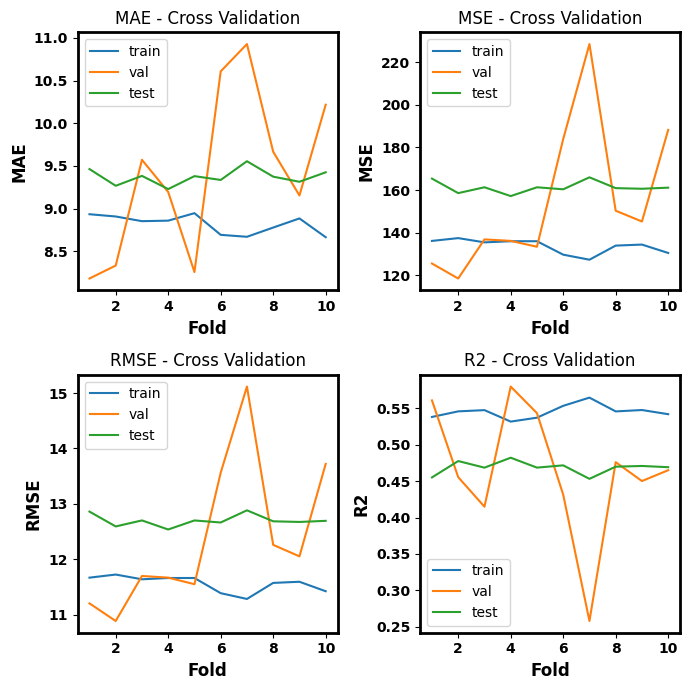

In [36]:
Plotters.plot_metricas_evaluacion(results, labels=labels, name_set='Cross Validation')

# Best Fold

In [37]:
mae_list = results['val']['mae']
min_mae_index = mae_list.index(min(mae_list))

y_labels_=results_per_fold_CN_test[min_mae_index]['y_labels']
y_pred_= results_per_fold_CN_test[min_mae_index]['y_pred_corrected']


                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     473.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.17e-47
Time:                        10:45:47   Log-Likelihood:                -529.35
No. Observations:                 146   AIC:                             1063.
Df Residuals:                     144   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2017      2.519      1.271      0.2

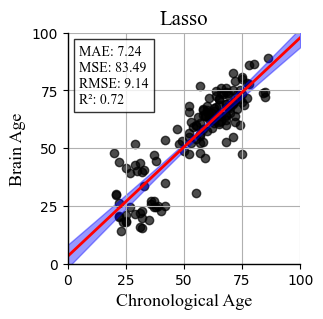

Error medio absoluto: 7.238532413542027
Error cuadrático medio: 83.48928941078752
Raíz del error cuadrático medio: 9.137247365086901
Coeficiente de determinación (R²): 0.7248650778618728


In [40]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

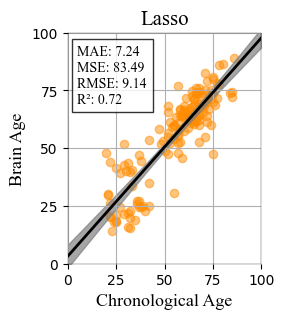

Error medio absoluto: 7.238532413542027
Error cuadrático medio: 83.48928941078752
Raíz del error cuadrático medio: 9.137247365086901
Coeficiente de determinación (R²): 0.7248650778618728


In [39]:
Plotters.plot_regresion(y=y_pred_,x= y_labels_, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Simple SHAP

In [41]:
X_CN_test = df_test.iloc[:, :-2]  # Features
y_CN_test = df_test.iloc[:, -2]   # Labels (Age)
ID_CN_test = df_test.iloc[:, -1]

ID_fold = results_per_fold_CN_train[min_mae_index]['ID-unique']
df_train_fold = df_concatenado_CN[df_concatenado_CN['ID-unique'].isin(ID_fold)]

X_train_kf_CN = df_train_fold.iloc[:, :-2]  # Features
y_train_kf_CN = df_train_fold.iloc[:, -2]   # Labels (Age)
id_train_kf_CN = df_train_fold.iloc[:, -1]

mean_X_train_kf=results_model['mean_X_train_kf'][min_mae_index]
std_X_train_kf=results_model['std_X_train_kf'][min_mae_index]

best_model = results_model['model'][min_mae_index]

X_train_kf_CN_scaled= (X_train_kf_CN - mean_X_train_kf) / std_X_train_kf
X_test_CN_scaled = (X_CN_test - mean_X_train_kf) / std_X_train_kf



In [42]:
shap_values, shap_summary_sorted = model.calculate_simple_shap(X_train=X_train_kf_CN_scaled, X_test=X_test_CN_scaled, model=best_model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD: 2570.8653122323067
Theta_canon_RPD: 2347.608765161251
Alpha1_canon_RPD: 1168.8849975691855
Theta_subj_spec_RPD: 1031.771898550703
Delta_canon_RPD: 1013.3028379385314
PE: 714.6063323437756
Low_subj_spec_EPP: 662.0056763479645
FD: 446.2970146186357
SSV: 418.0933291457916
Delta_subj_spec_RPD: 416.510420548101
Beta1_canon_RPD: 392.4799441261358
IAF: 389.9660598797847
Beta_subj_spec_RPD: 347.2360639374724
Alpha2_canon_RPD: 291.5129097329985
Gamma_subj_spec_RPD: 229.82887898377453
Offset: 159.4402194891794
WMEAN: 89.23643581539818
TF: 83.71791186073227
Beta2_canon_RPD: 46.072778972532205
Slope: 45.93760152254304
Knee: 26.518195748850253
Gamma_canon_RPD: 24.951270695764357
Beta3_canon_RPD: 8.205243765357537
Alpha1_canon_EPP: 0.02030571993350088
Theta_canon_EPP: 0.02030196606457972
Beta_subj_spec_EPP: 0.019675002614043494
Delta_canon_EPP: 0.019309524435504884
Beta1_canon_EPP: 0.018035600718542613
Alpha2_canon_EPP

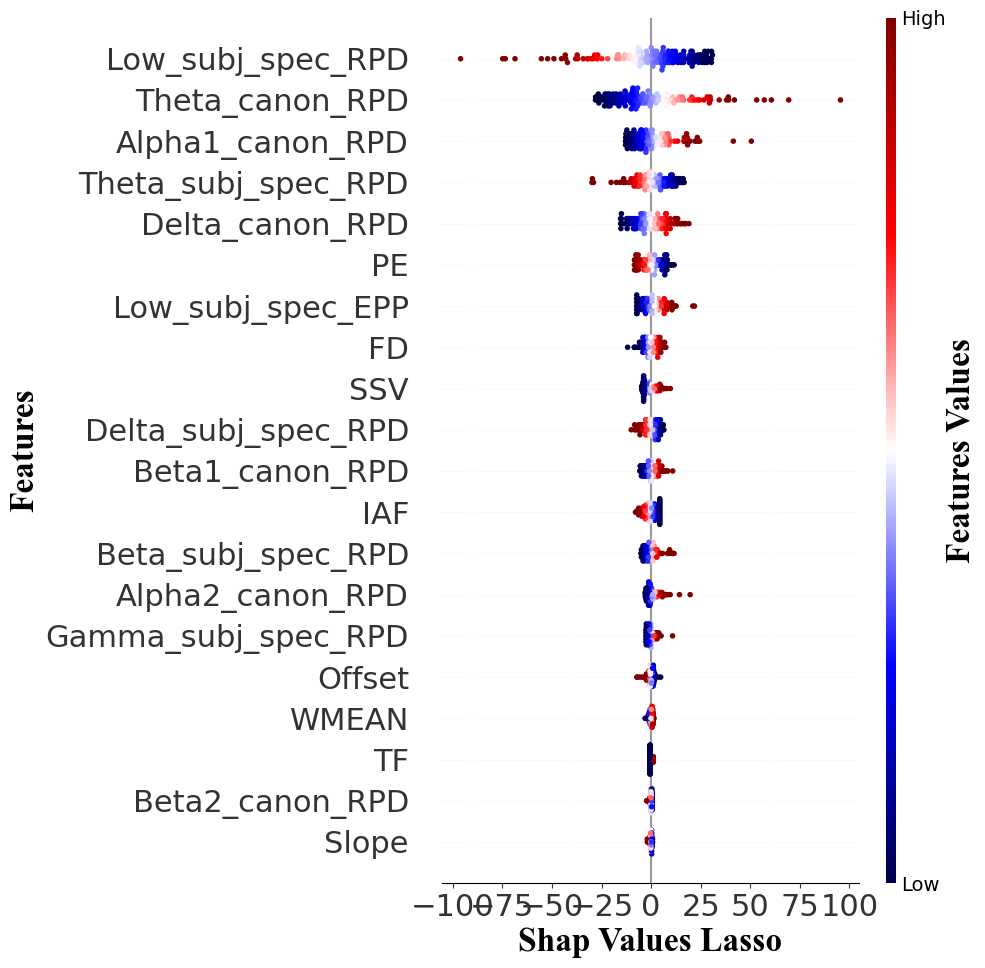

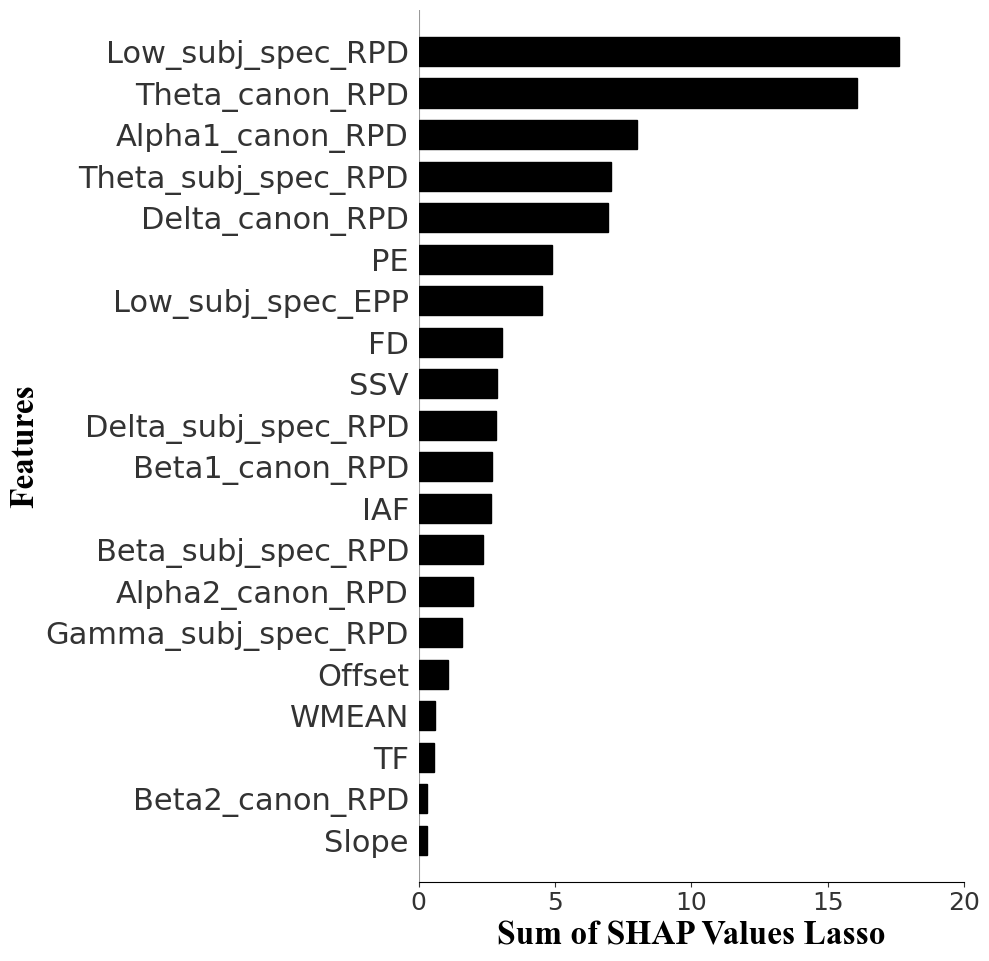

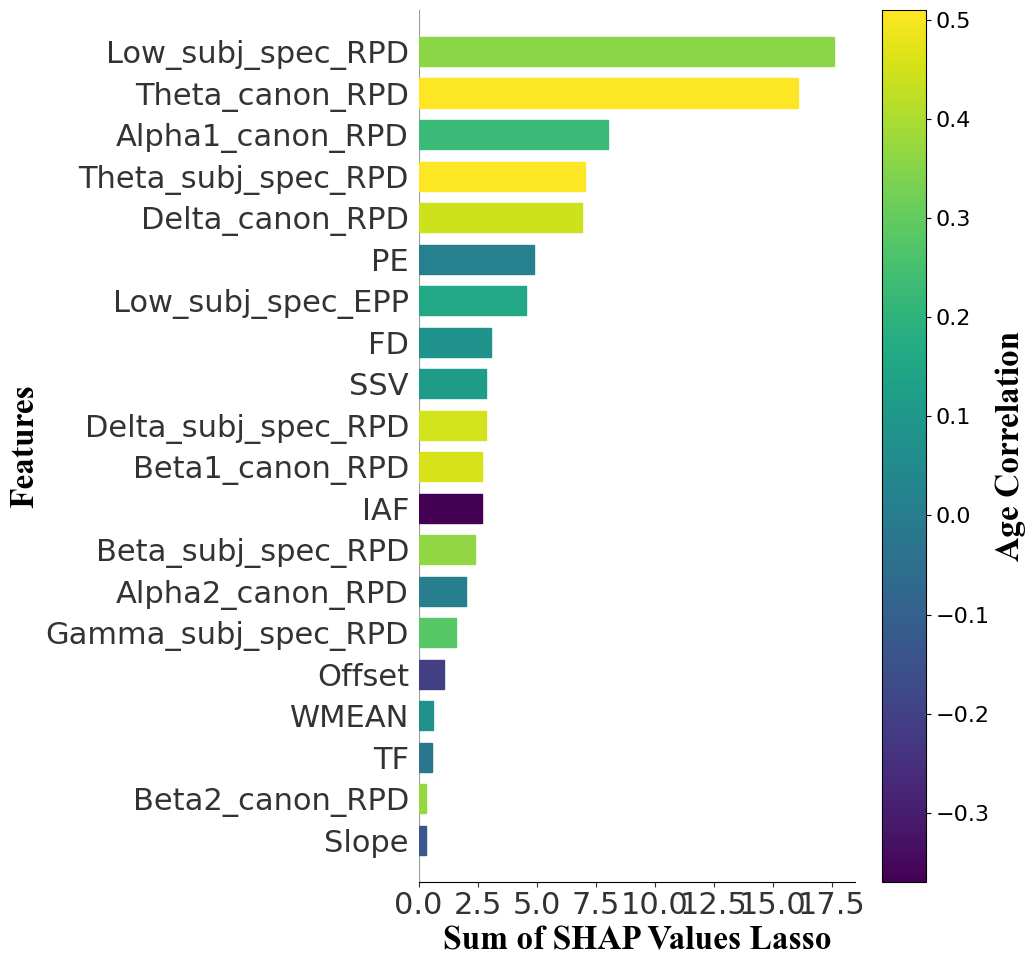

In [43]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=X_test_CN_scaled,y_test=y_CN_test, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

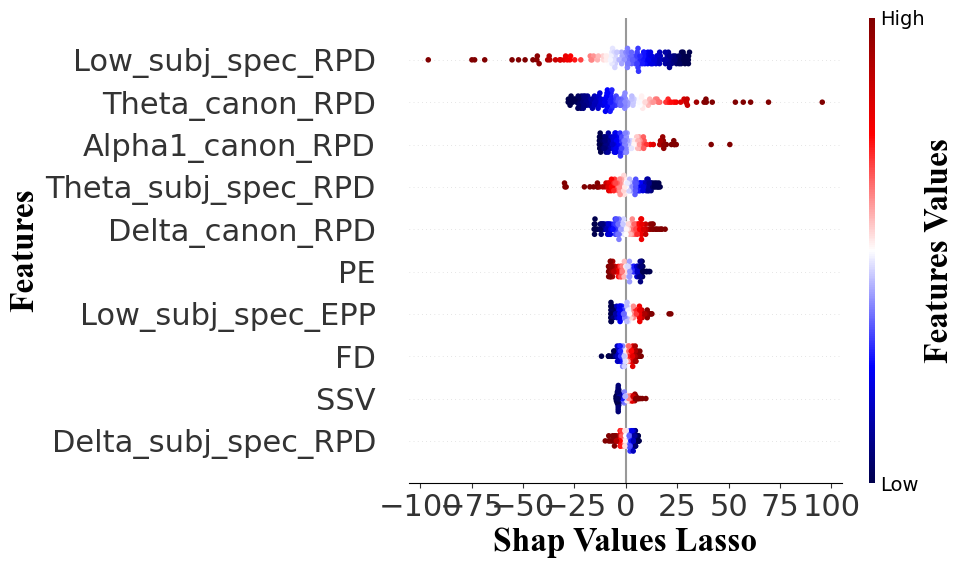

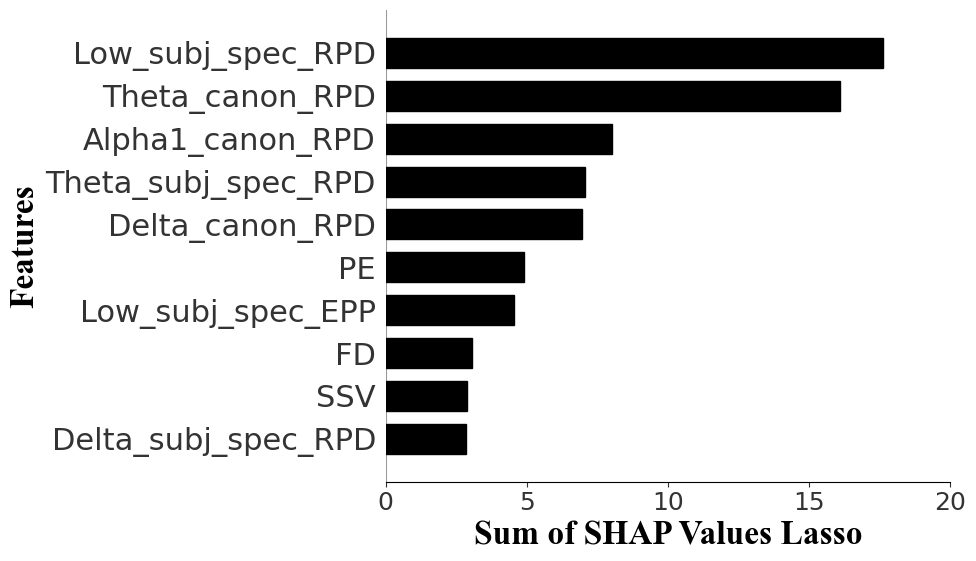

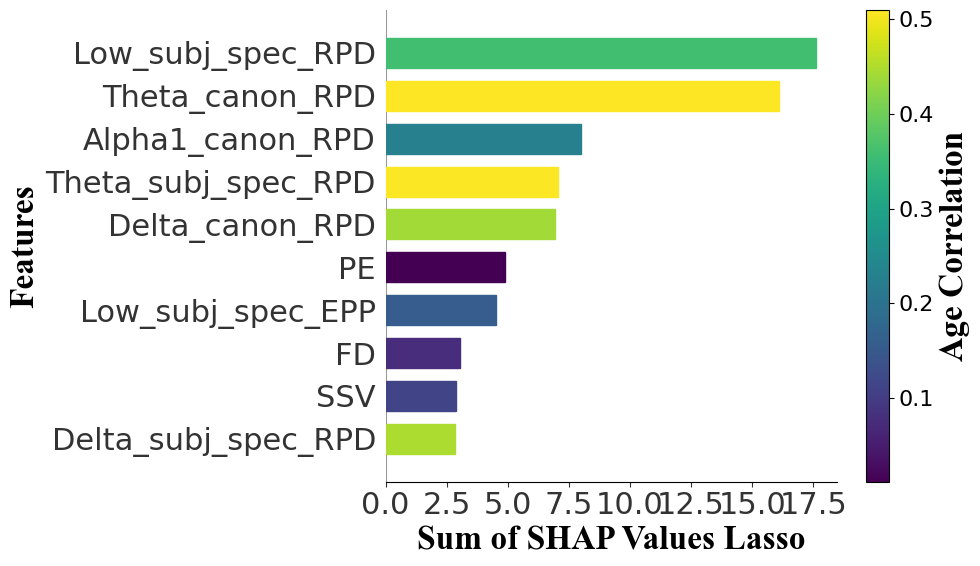

In [44]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=X_test_CN_scaled,y_test=y_CN_test, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation',max_features=10)

# Taining 20-Iteration 10-Kfold 100%data

In [46]:
results_labels_df_CN_train,results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train,results_per_fold_CN_test, results_per_fold_pat= model.trainer(df_CN=df_concatenado_CN, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:233: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_train = pd.concat([results_labels_df_CN_train, temp_CN_df_train], ignore_index=True)
C:\Users/felipe/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_regressor.py:235: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN_test = pd.concat([results_labels_df_CN_te

In [47]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, 
           results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [21]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

# Acceder a los objetos
results_labels_df_CN_train, results_labels_df_CN_test, results_labels_list, results_model, results_per_fold_CN_train, results_per_fold_CN_test, results_per_fold_pat = loaded_results

In [48]:
results_labels_df_total = [results_labels_df_CN_test]
results_avg_list = model.avg_list(results_labels_df_total)


In [56]:
results_avg_list_CN = results_avg_list[0]
df_CN_seleccion = df_CN_filtrado[['ID-unique',  'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI']]
df_CN_results = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')


In [57]:
df_CN_results.to_excel('results/df_CN_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1580.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          3.49e-184
Time:                        10:47:37   Log-Likelihood:                -2785.5
No. Observations:                 726   AIC:                             5575.
Df Residuals:                     724   BIC:                             5584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3841      1.438      1.658      0.0

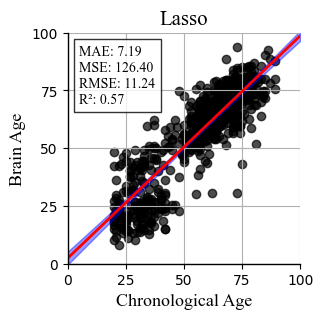

Error medio absoluto: 7.185341608722474
Error cuadrático medio: 126.39641850213911
Raíz del error cuadrático medio: 11.242616176946498
Coeficiente de determinación (R²): 0.5737272756340808


In [50]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='Lasso',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

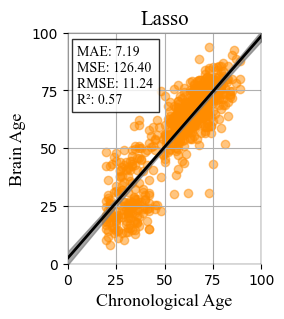

Error medio absoluto: 7.185341608722474
Error cuadrático medio: 126.39641850213911
Raíz del error cuadrático medio: 11.242616176946498
Coeficiente de determinación (R²): 0.5737272756340808


In [51]:
Plotters.plot_regresion(y=results_avg_list[0]['y_pred_corrected'],x= results_avg_list[0]['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=colorset, title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2.5,y_size=3, legend=False, fontsize=13, mode=3, legend_metrics=True)

# Multiple SHAP

In [52]:
shap_values_CN, shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN, results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'], slice(None, -2)
)

Importancia de características basada en suma de valores SHAP:
Theta_canon_RPD: 8219.32023299389
Low_subj_spec_RPD: 6739.988805264156
Delta_canon_RPD: 4927.936257799443
Alpha1_canon_RPD: 4899.403429206806
Theta_subj_spec_RPD: 4604.926880319185
Beta1_canon_RPD: 2568.9359298496915
PE: 2371.605115483287
SSV: 2119.0929113728316
Gamma_subj_spec_RPD: 1761.836706548247
Delta_subj_spec_RPD: 1752.8907458741367
High_subj_spec_RPD: 1738.247432320243
IAF: 1632.5391325205637
Low_subj_spec_EPP: 1613.4917936216068
Beta_subj_spec_RPD: 1581.6749266895451
Alpha2_canon_RPD: 1496.1888040473302
WMEAN: 1410.6558260443226
FD: 1305.1998369659796
Offset: 773.1146724840205
Slope: 280.8530545626269
Gamma_canon_RPD: 278.4515663989259
Beta3_canon_RPD: 246.98155350058752
Knee: 208.91595458437186
TF: 197.80888639861507
Beta2_canon_RPD: 165.83299084365564
Delta_canon_EPP: 0.26490436747534907
Alpha1_canon_EPP: 0.2420151967766968
Beta1_canon_EPP: 0.21324791195117046
Beta_subj_spec_EPP: 0.20291778590441512
Theta_canon_E

In [76]:
with open('results_model/shap_summary_sorted.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted, f)

with open('results_model/shap_values_avg_array.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

In [ ]:
with open('results_model/shap_summary_sorted.pkl', 'rb') as f:
    shap_summary_sorted = pickle.load(f)

with open('results_model/shap_values_avg_array.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)


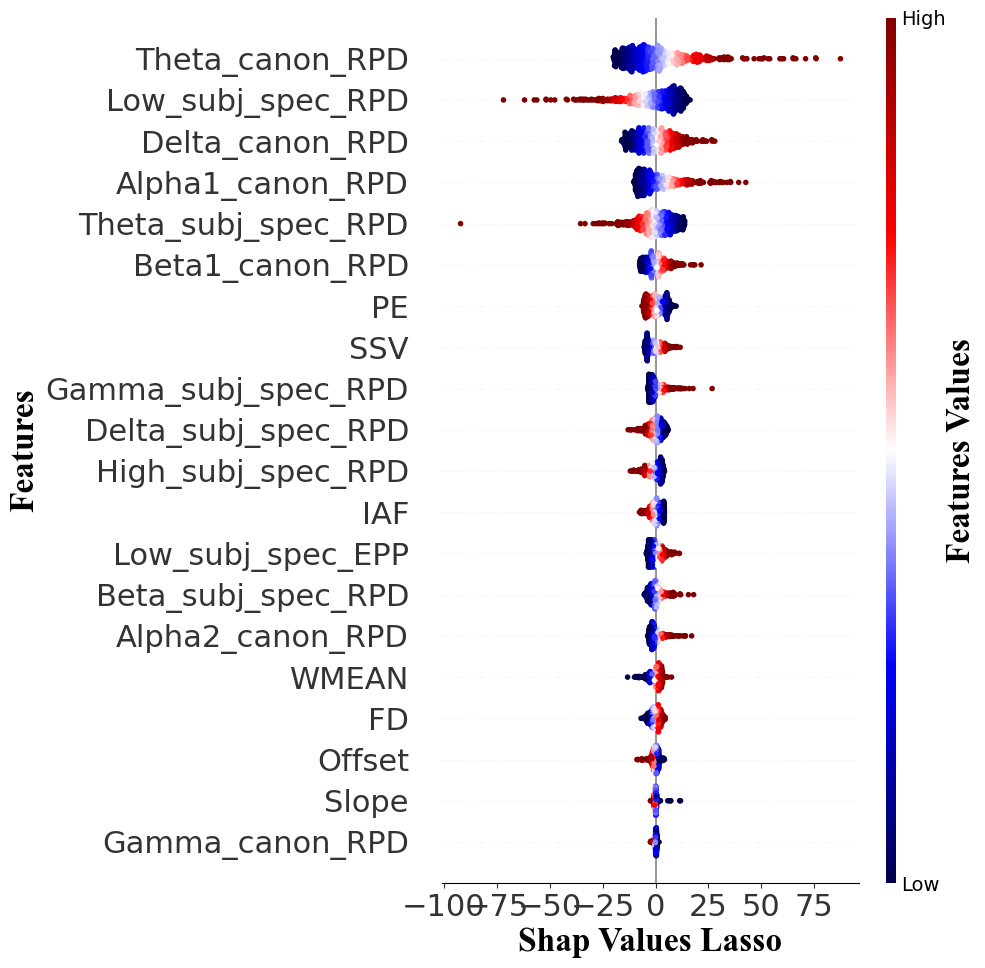

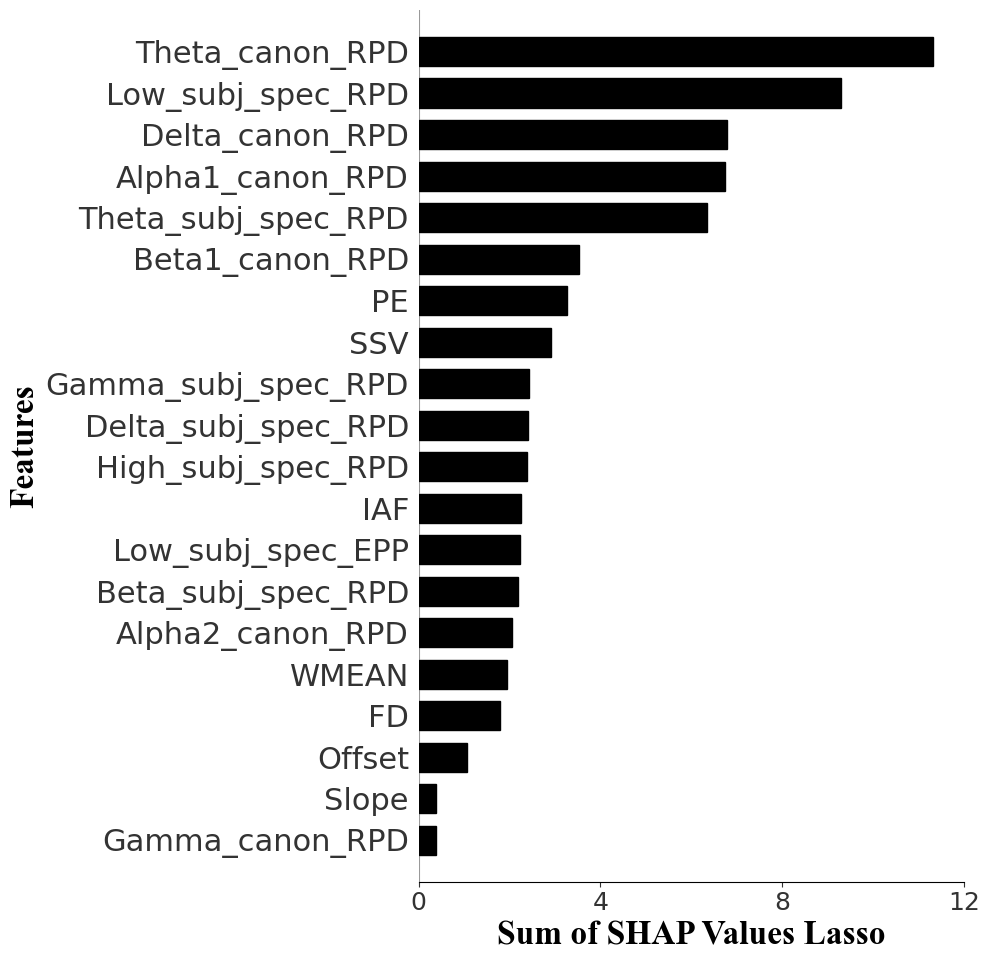

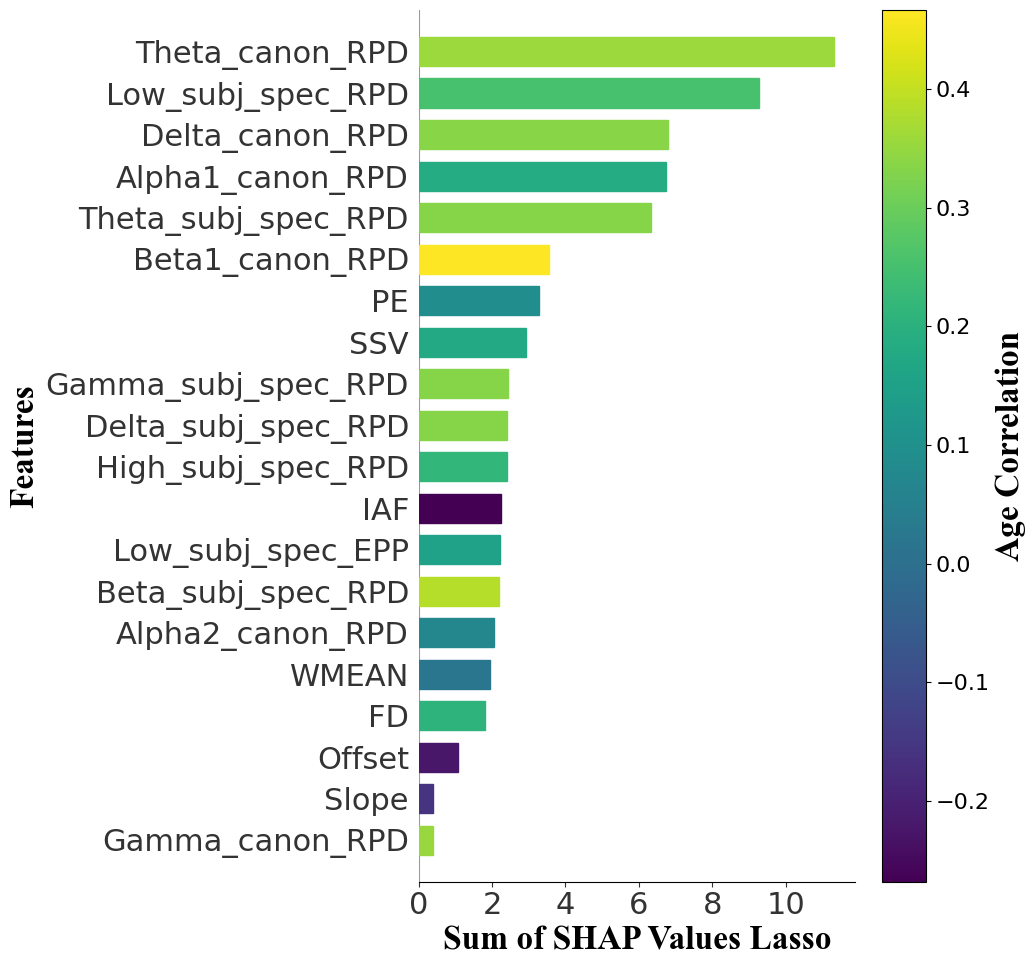

In [53]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

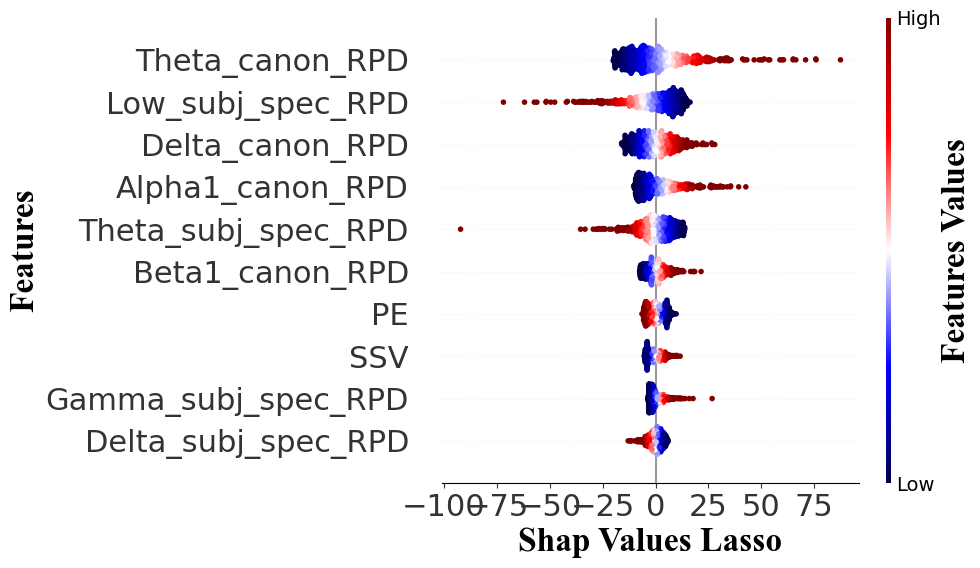

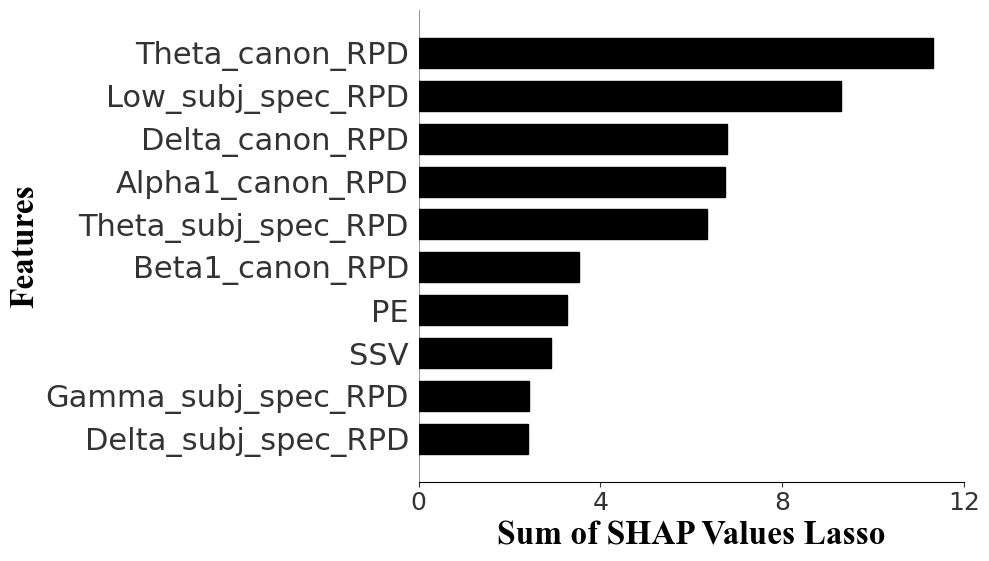

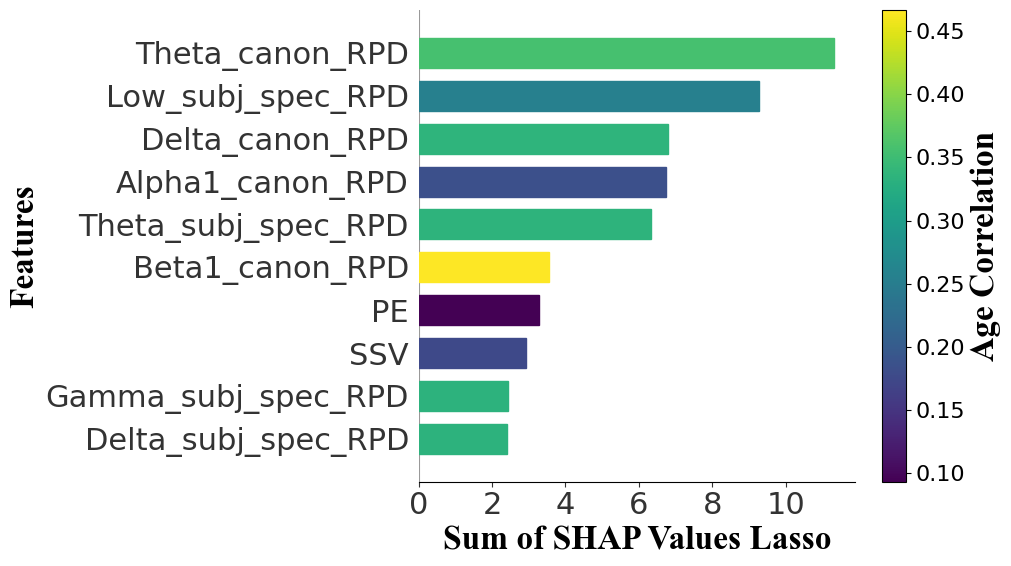

In [54]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation',max_features=10)